In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

tweets = pd.read_csv('csv/train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
tweets = tweets.fillna(value= 'Not Especified')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
tweets['location'].value_counts()

Not Especified           2533
USA                       104
New York                   71
United States              50
London                     45
                         ... 
Ames, Iowa                  1
missouri USA                1
Okuma Town, Fukushima       1
52.479722, 62.184971        1
Hawaii USA                  1
Name: location, Length: 3342, dtype: int64

In [5]:
tweets['text lenght'] = tweets['text'].str.len()

In [6]:
tweets_by_loc = tweets[['location', 'target', 'text lenght']]

#esta linea genera un warning (de lo que lei es un falso positivo por que al hacer asignaciones encadenadas puede que el resultado no sea el esperado pero este no es el caso), no se arreglarlo
tweets_by_loc['cuantity'] = 1

tweets_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     7613 non-null   object
 1   target       7613 non-null   int64 
 2   text lenght  7613 non-null   int64 
 3   cuantity     7613 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 238.0+ KB


/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
is_false = []
for item in tweets['target']:
    is_false.append(1 if item == 0 else 0)
tweets.head()

,id,keyword,location,text,target,text lenght
0,1,Not Especified,Not Especified,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Not Especified,Not Especified,Forest fire near La Ronge Sask. Canada,1,38
2,5,Not Especified,Not Especified,All residents asked to 'shelter in place' are ...,1,133
3,6,Not Especified,Not Especified,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Not Especified,Not Especified,Just got sent this photo from Ruby #Alaska as ...,1,88


In [8]:
false_tweets = tweets[['location']]

In [9]:
tweets_by_loc = tweets_by_loc.groupby('location').sum()

In [10]:
tweets_by_loc.sample(n=10)

,target,text lenght,cuantity
location,,,
"Kenosha, WI 53143",0,100,1
Tafekop Ga-Matsepe,1,132,1
whs '17,0,107,1
"Atlantic Highlands, NJ",1,83,1
"Paradise, NV",0,93,1
garowe puntland somalia,1,46,1
NIFC,1,138,1
"London, England",1,855,10
Tampa,0,133,1


In [11]:
tweets_by_loc_with_frecuency = tweets_by_loc.sort_values('target', ascending=False)

In [12]:
tweets_by_loc_with_frecuency['keyword'] = tweets['keyword']
tweets_by_loc_with_frecuency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3342 entries, Not Especified to Rutherfordton, NC
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       3342 non-null   int64 
 1   text lenght  3342 non-null   int64 
 2   cuantity     3342 non-null   int64 
 3   keyword      0 non-null      object
dtypes: int64(3), object(1)
memory usage: 130.5+ KB


In [13]:
tweets_by_loc_with_frecuency['Veracidad'] = tweets_by_loc_with_frecuency['target'] / tweets_by_loc_with_frecuency['cuantity']
tweets_by_loc_with_frecuency = tweets_by_loc_with_frecuency.sort_values('Veracidad', ascending = False)
tweets_by_loc_with_frecuency.tail(10)

,target,text lenght,cuantity,keyword,Veracidad
location,,,,,
"Zeerust, South Africa",0,108,1,NaN,0.0
Zero Branco,0,58,1,NaN,0.0
? Philly Baby ?,0,94,1,NaN,0.0
? Jet Life ?,0,115,1,NaN,0.0
[ Blonde Bi Fry. ],0,27,1,NaN,0.0
Wrex,0,78,1,NaN,0.0
2005 |-/,0,102,1,NaN,0.0
Worldwide.,0,132,1,NaN,0.0
????,0,197,2,NaN,0.0


In [14]:
cuantity_mean = tweets_by_loc['cuantity'].mean()
has_more_tweets_than_cuantity_mean = (tweets_by_loc_with_frecuency['cuantity'] > 10)
locations_with_more_than_10_tweets = tweets_by_loc_with_frecuency[has_more_tweets_than_cuantity_mean]
del locations_with_more_than_10_tweets['target']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('Veracidad', ascending =True)
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.reset_index()
locations_with_more_than_10_tweets.head(10)

,location,text lenght,cuantity,keyword,Veracidad
0,NYC,1406,12,NaN,0.166667
1,Everywhere,1335,15,NaN,0.200000
2,Florida,1540,14,NaN,0.214286
3,New York,9234,71,NaN,0.225352
4,Kenya,2635,20,NaN,0.250000
5,United Kingdom,1400,14,NaN,0.285714
6,"Los Angeles, CA",2969,26,NaN,0.307692
7,London,4820,45,NaN,0.355556
8,Seattle,1392,11,NaN,0.363636
9,Chicago,1229,11,NaN,0.363636


In [15]:
tweets_by_loc_with_frecuency = tweets_by_loc_with_frecuency.reset_index()
tweets_by_loc_with_frecuency.head()

,location,target,text lenght,cuantity,keyword,Veracidad
0,Asia Pacific,1,139,1,NaN,1.0
1,Philippines,1,142,1,NaN,1.0
2,"Rock Springs, WY",1,144,1,NaN,1.0
3,"Pueblo, CO",1,56,1,NaN,1.0
4,Providence RI / Lisnaskea,1,137,1,NaN,1.0


In [16]:
locations_with_more_than_10_tweets['Veracidad'] = locations_with_more_than_10_tweets['Veracidad'] * 100

Text(0.5, 1.0, 'Top 10 Locaciones con Mayor Ratio de Tweets Veraces')

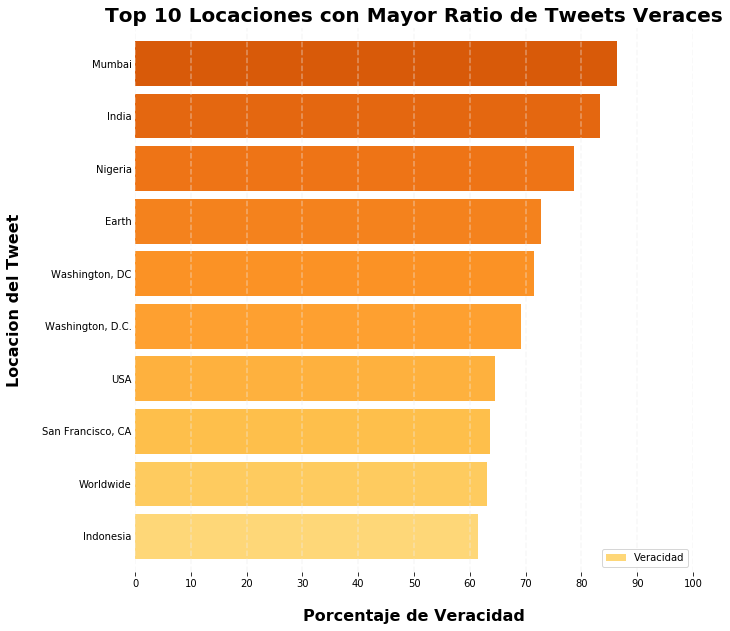

In [17]:

saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.tail(10).plot(kind='barh', y ='Veracidad', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 100+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Porcentaje de Veracidad", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Top 10 Locaciones con Mayor Ratio de Tweets Veraces", weight='bold', size=20)


In [18]:
tweets_by_loc_with_frecuency.head(10)

,location,target,text lenght,cuantity,keyword,Veracidad
0,Asia Pacific,1,139,1,NaN,1.0
1,Philippines,1,142,1,NaN,1.0
2,"Rock Springs, WY",1,144,1,NaN,1.0
3,"Pueblo, CO",1,56,1,NaN,1.0
4,Providence RI / Lisnaskea,1,137,1,NaN,1.0
5,Proud @BuckMasonUSA supporter!,1,114,1,NaN,1.0
6,Pro-American and Anti-#Occupy,1,129,1,NaN,1.0
7,"Peterborough, Ont.",1,92,1,NaN,1.0
8,"Peterborough, Ontario, Canada",1,134,1,NaN,1.0
9,"Philadelphia, PA USA",1,102,1,NaN,1.0


In [19]:
top_10_tweets_by_loc = (tweets_by_loc_with_frecuency.loc[:,'target'] >= 15)
top_10 = tweets_by_loc_with_frecuency.loc[top_10_tweets_by_loc]
top_10.head(15)

,location,target,text lenght,cuantity,keyword,Veracidad
1199,Mumbai,19,2740,22,NaN,0.863636
1200,India,20,2470,24,NaN,0.833333
1209,Nigeria,22,3360,28,NaN,0.785714
1224,"Washington, DC",15,2430,21,NaN,0.714286
1265,USA,67,11285,104,NaN,0.644231
1278,UK,16,3133,27,NaN,0.592593
1283,United States,27,5001,50,NaN,0.540000
1429,Not Especified,1075,249413,2533,NaN,0.424398
1440,London,16,4820,45,NaN,0.355556
1498,New York,16,9234,71,NaN,0.225352


Text(0.5, 1.0, 'Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos')

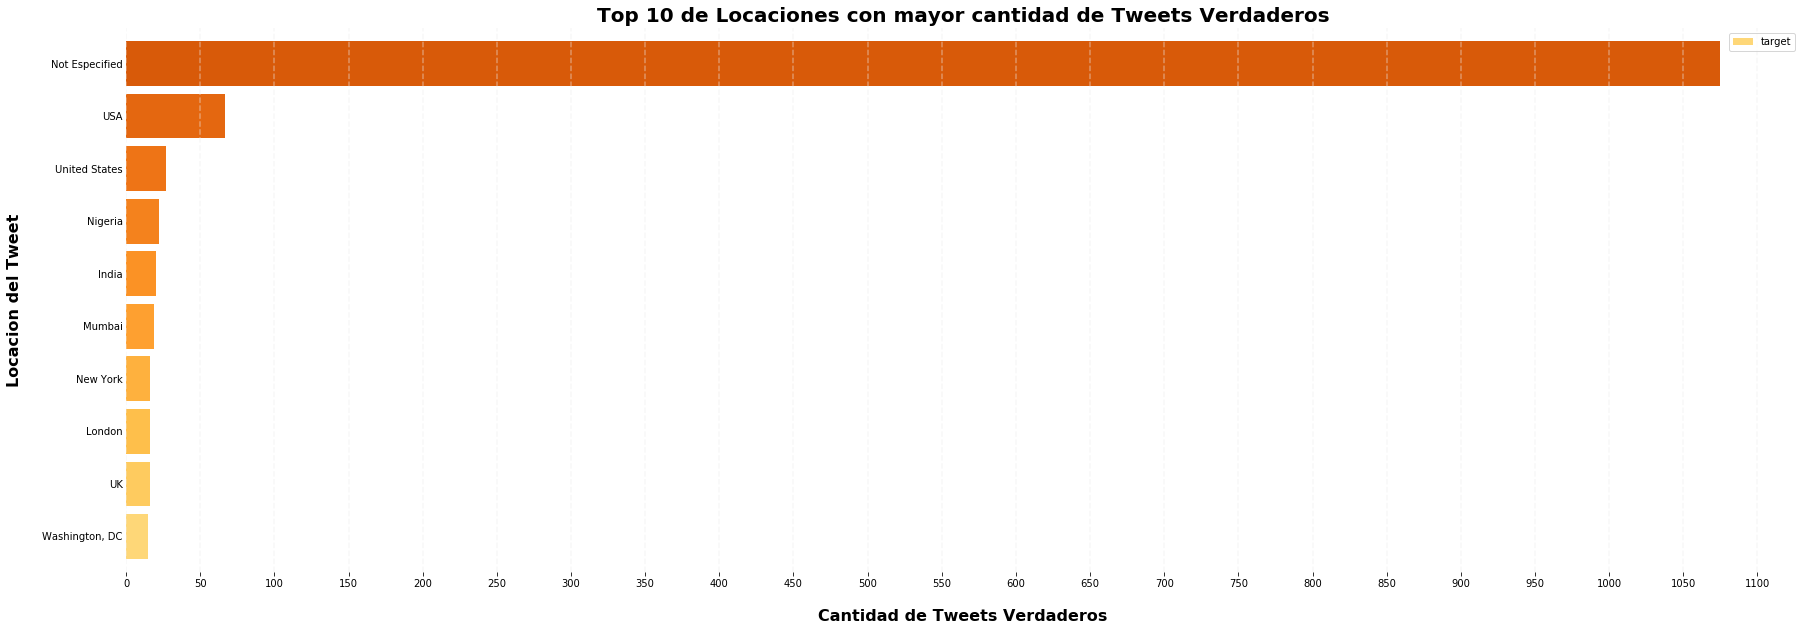

In [20]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top_10 = top_10.sort_values('target')
top10_plot = top_10.plot(kind='barh', y ='target', x = 'location', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1101, 50.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con mayor cantidad de Tweets Verdaderos", weight='bold', size=20)

In [21]:
false_tweets['is false'] = is_false
false_tweets['cuantity'] = 1
false_tweets = false_tweets.groupby('location').sum()
false_tweets.sample(n=15)

/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,is false,cuantity
location,,
"Lancaster, Pennsylvania, USA",0,1
in the Word of God,2,5
"Long Beach, CA",1,1
A sofa,1,1
nbc washington,0,1
death star,1,1
"ÌÏT: -26.695807,27.837865",1,1
Manhattan,1,1
"Palm Desert, CA",1,1


In [22]:
false_tweets['Porcentaje de Falsedad'] = (false_tweets['is false'] / false_tweets['cuantity']) *100
false_tweets.head(10)

,is false,cuantity,Porcentaje de Falsedad
location,,,
,0,1,0.0
Glasgow,1,1,100.0
"Melbourne, Australia",1,1,100.0
News,0,1,0.0
å_,1,1,100.0
45å¡ 5'12.53N 14å¡ 7'24.93E,1,1,100.0
"616 Û¢ Kentwood , MI",0,1,0.0
? ??????? ? ( ?? å¡ ? ? ? å¡),0,1,0.0
?currently writing a book?,1,1,100.0


In [23]:
has_more_tweets_than_10_tweets = (false_tweets['cuantity'] > 10)
locations_with_more_than_10_tweets_false = false_tweets[has_more_tweets_than_10_tweets]
locations_with_more_than_10_tweets_false = locations_with_more_than_10_tweets_false.sort_values('Porcentaje de Falsedad', ascending =True)
locations_with_more_than_10_tweets_false = locations_with_more_than_10_tweets_false.reset_index()
locations_with_more_than_10_tweets_false.head(10)

,location,is false,cuantity,Porcentaje de Falsedad
0,Mumbai,3,22,13.636364
1,India,4,24,16.666667
2,Nigeria,6,28,21.428571
3,Earth,3,11,27.272727
4,"Washington, DC",6,21,28.571429
5,"Washington, D.C.",4,13,30.769231
6,USA,37,104,35.576923
7,"San Francisco, CA",4,11,36.363636
8,Worldwide,7,19,36.842105
9,Indonesia,5,13,38.461538


Text(0.5, 1.0, 'Top 10 de Locaciones con Mayor Ratio de Tweets Falsos')

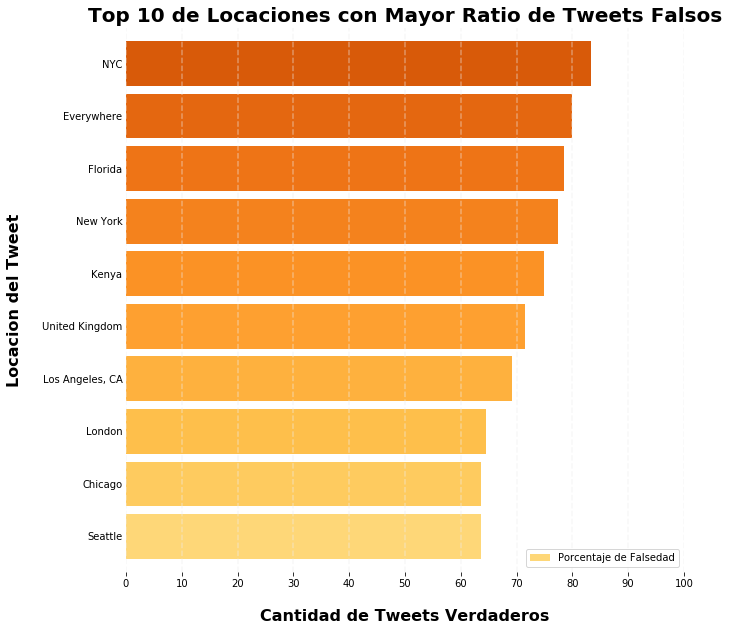

In [24]:
saltos = np.linspace(0.3, 0.7, 10)
colores = (cm.get_cmap('YlOrBr'))(saltos)
top10_plot = locations_with_more_than_10_tweets_false.tail(10).plot(kind='barh', y ='Porcentaje de Falsedad', x = 'location', figsize=(10,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 101, 10.0))
plt.tick_params(axis='y', length=0)

top10_plot.spines['right'].set_visible(False)
top10_plot.spines['top'].set_visible(False)
top10_plot.spines['left'].set_visible(False)
top10_plot.spines['bottom'].set_visible(False)

lineas = top10_plot.get_xticks()
for i in lineas:
      top10_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
top10_plot.set_xlabel("Cantidad de Tweets Verdaderos", labelpad=20, weight='bold', size=16)
top10_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
top10_plot.set_title("Top 10 de Locaciones con Mayor Ratio de Tweets Falsos", weight='bold', size=20)

In [25]:
locations_with_more_than_10_tweets['text lenght mean'] = locations_with_more_than_10_tweets['text lenght'] / locations_with_more_than_10_tweets['cuantity']
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.sort_values('text lenght mean')
locations_with_more_than_10_tweets.head()

,location,text lenght,cuantity,keyword,Veracidad,text lenght mean
1,Everywhere,1335,15,NaN,20.000000,89.000000
25,"San Francisco, CA",994,11,NaN,63.636364,90.363636
11,Not Especified,249413,2533,NaN,42.439795,98.465456
23,Indonesia,1292,13,NaN,61.538462,99.384615
5,United Kingdom,1400,14,NaN,28.571429,100.000000


Text(0.5, 1.0, 'Longitud Promedio de Tweets Por Locacion ')

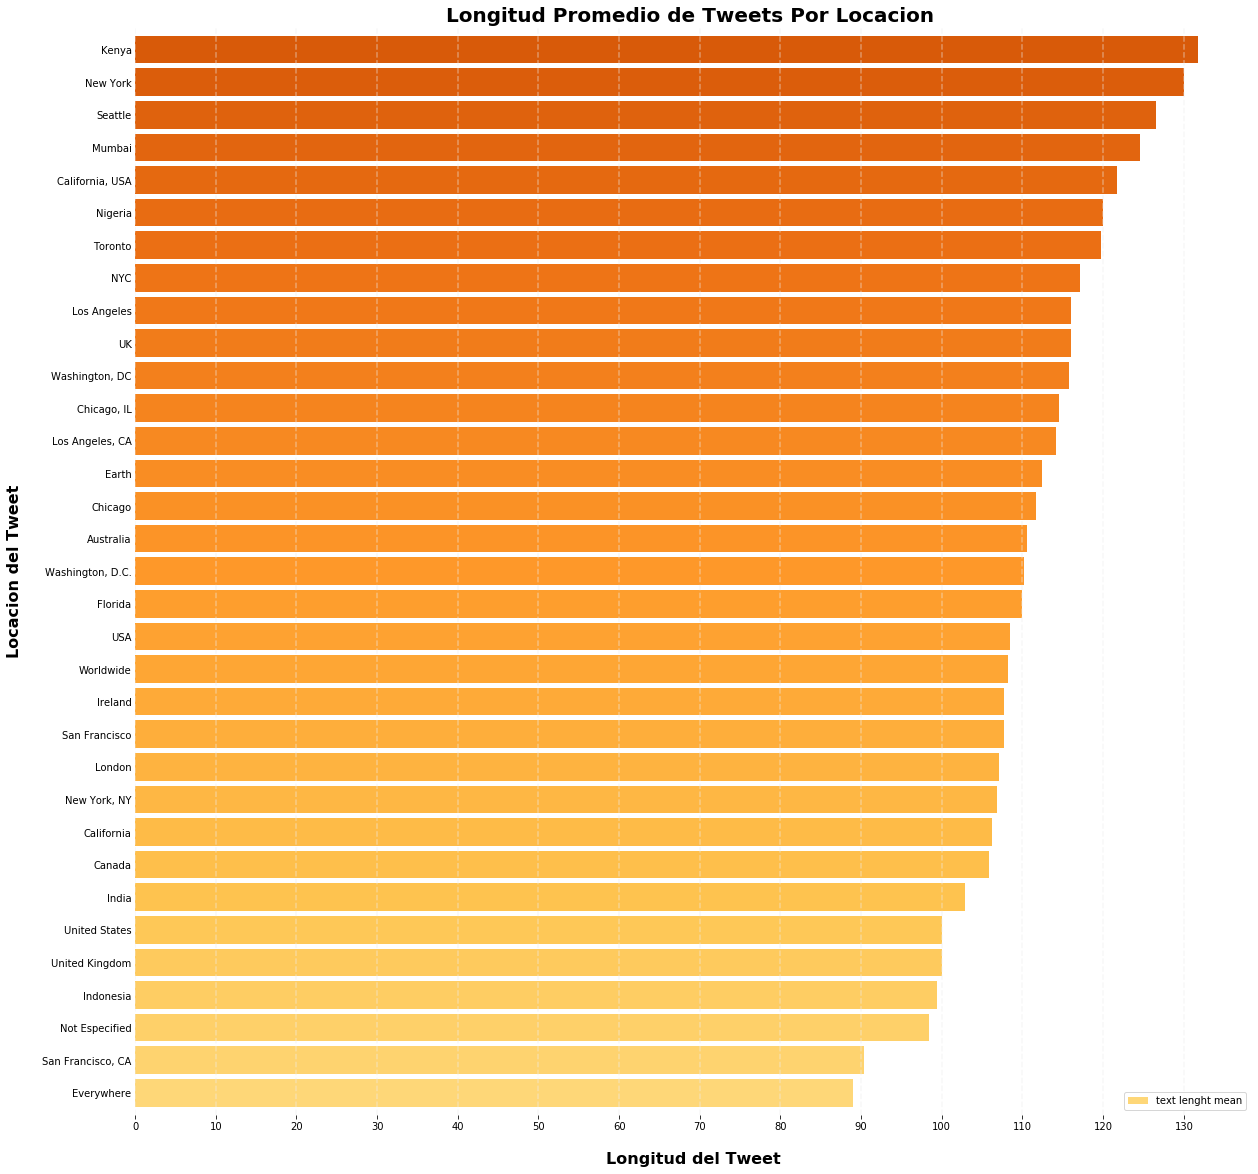

In [26]:
saltos = np.linspace(0.3, 0.7, 33)
colores = (cm.get_cmap('YlOrBr'))(saltos)
locations_with_more_than_10_tweets_plot = locations_with_more_than_10_tweets.plot(kind='barh', y ='text lenght mean', x = 'location', figsize=(20,20), color=colores, width=0.85)

plt.xticks(np.arange(0, 130+1, 10.0))
plt.tick_params(axis='y', length=0)

locations_with_more_than_10_tweets_plot.spines['right'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['top'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['left'].set_visible(False)
locations_with_more_than_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = locations_with_more_than_10_tweets_plot.get_xticks()
for i in lineas:
      locations_with_more_than_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
locations_with_more_than_10_tweets_plot.set_xlabel("Longitud del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_ylabel("Locacion del Tweet", labelpad=20, weight='bold', size=16)
locations_with_more_than_10_tweets_plot.set_title("Longitud Promedio de Tweets Por Locacion ", weight='bold', size=20)

In [27]:
#tweets_by_loc_and_keyword = tweets[['location', 'keyword']]
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets.fillna(value = 'Not Especified')
locations_with_more_than_10_tweets.head()

,location,text lenght,cuantity,keyword,Veracidad,text lenght mean
1,Everywhere,1335,15,Not Especified,20.000000,89.000000
25,"San Francisco, CA",994,11,Not Especified,63.636364,90.363636
11,Not Especified,249413,2533,Not Especified,42.439795,98.465456
23,Indonesia,1292,13,Not Especified,61.538462,99.384615
5,United Kingdom,1400,14,Not Especified,28.571429,100.000000


In [28]:
tweets_keyword = tweets[['keyword']]
tweets_keyword['cuantity'] = 1 

/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#mean_cuantity = tweets_by_loc_and_keyword.groupby('location').sum()['cuantity'].mean()
#mean_cuantity

In [30]:
keywords_mas_usadas = tweets_keyword.groupby('keyword').sum().sort_values('cuantity', ascending = False).head(30)
keywords_mas_usadas = keywords_mas_usadas.reset_index()
keywords_mas_usadas.head()

,keyword,cuantity
0,Not Especified,61
1,fatalities,45
2,deluge,42
3,armageddon,42
4,sinking,41


In [31]:
keywords_mas_usadas = keywords_mas_usadas.reset_index()
keywords_mas_usadas_serie = pd.Series(keywords_mas_usadas['keyword'].values)
keywords_mas_usadas_serie.head(30)

0     Not Especified
1         fatalities
2             deluge
3         armageddon
4            sinking
5             damage
6               harm
7        body%20bags
8           evacuate
9               fear
10          outbreak
11             siren
12           twister
13         windstorm
14          collided
15          sinkhole
16              sunk
17          hellfire
18            weapon
19           weapons
20            famine
21         explosion
22         whirlwind
23        earthquake
24        derailment
25          wreckage
26         collision
27            flames
28           wrecked
29         ambulance
dtype: object

In [37]:
locations_with_more_than_10_tweets = locations_with_more_than_10_tweets[locations_with_more_than_10_tweets['keyword'].isin(keywords_mas_usadas['keyword'])]
locations_with_more_than_10_tweets['keyword'].value_counts()

Not Especified    33
Name: keyword, dtype: int64

Text(0, 0.5, 'Locacion')

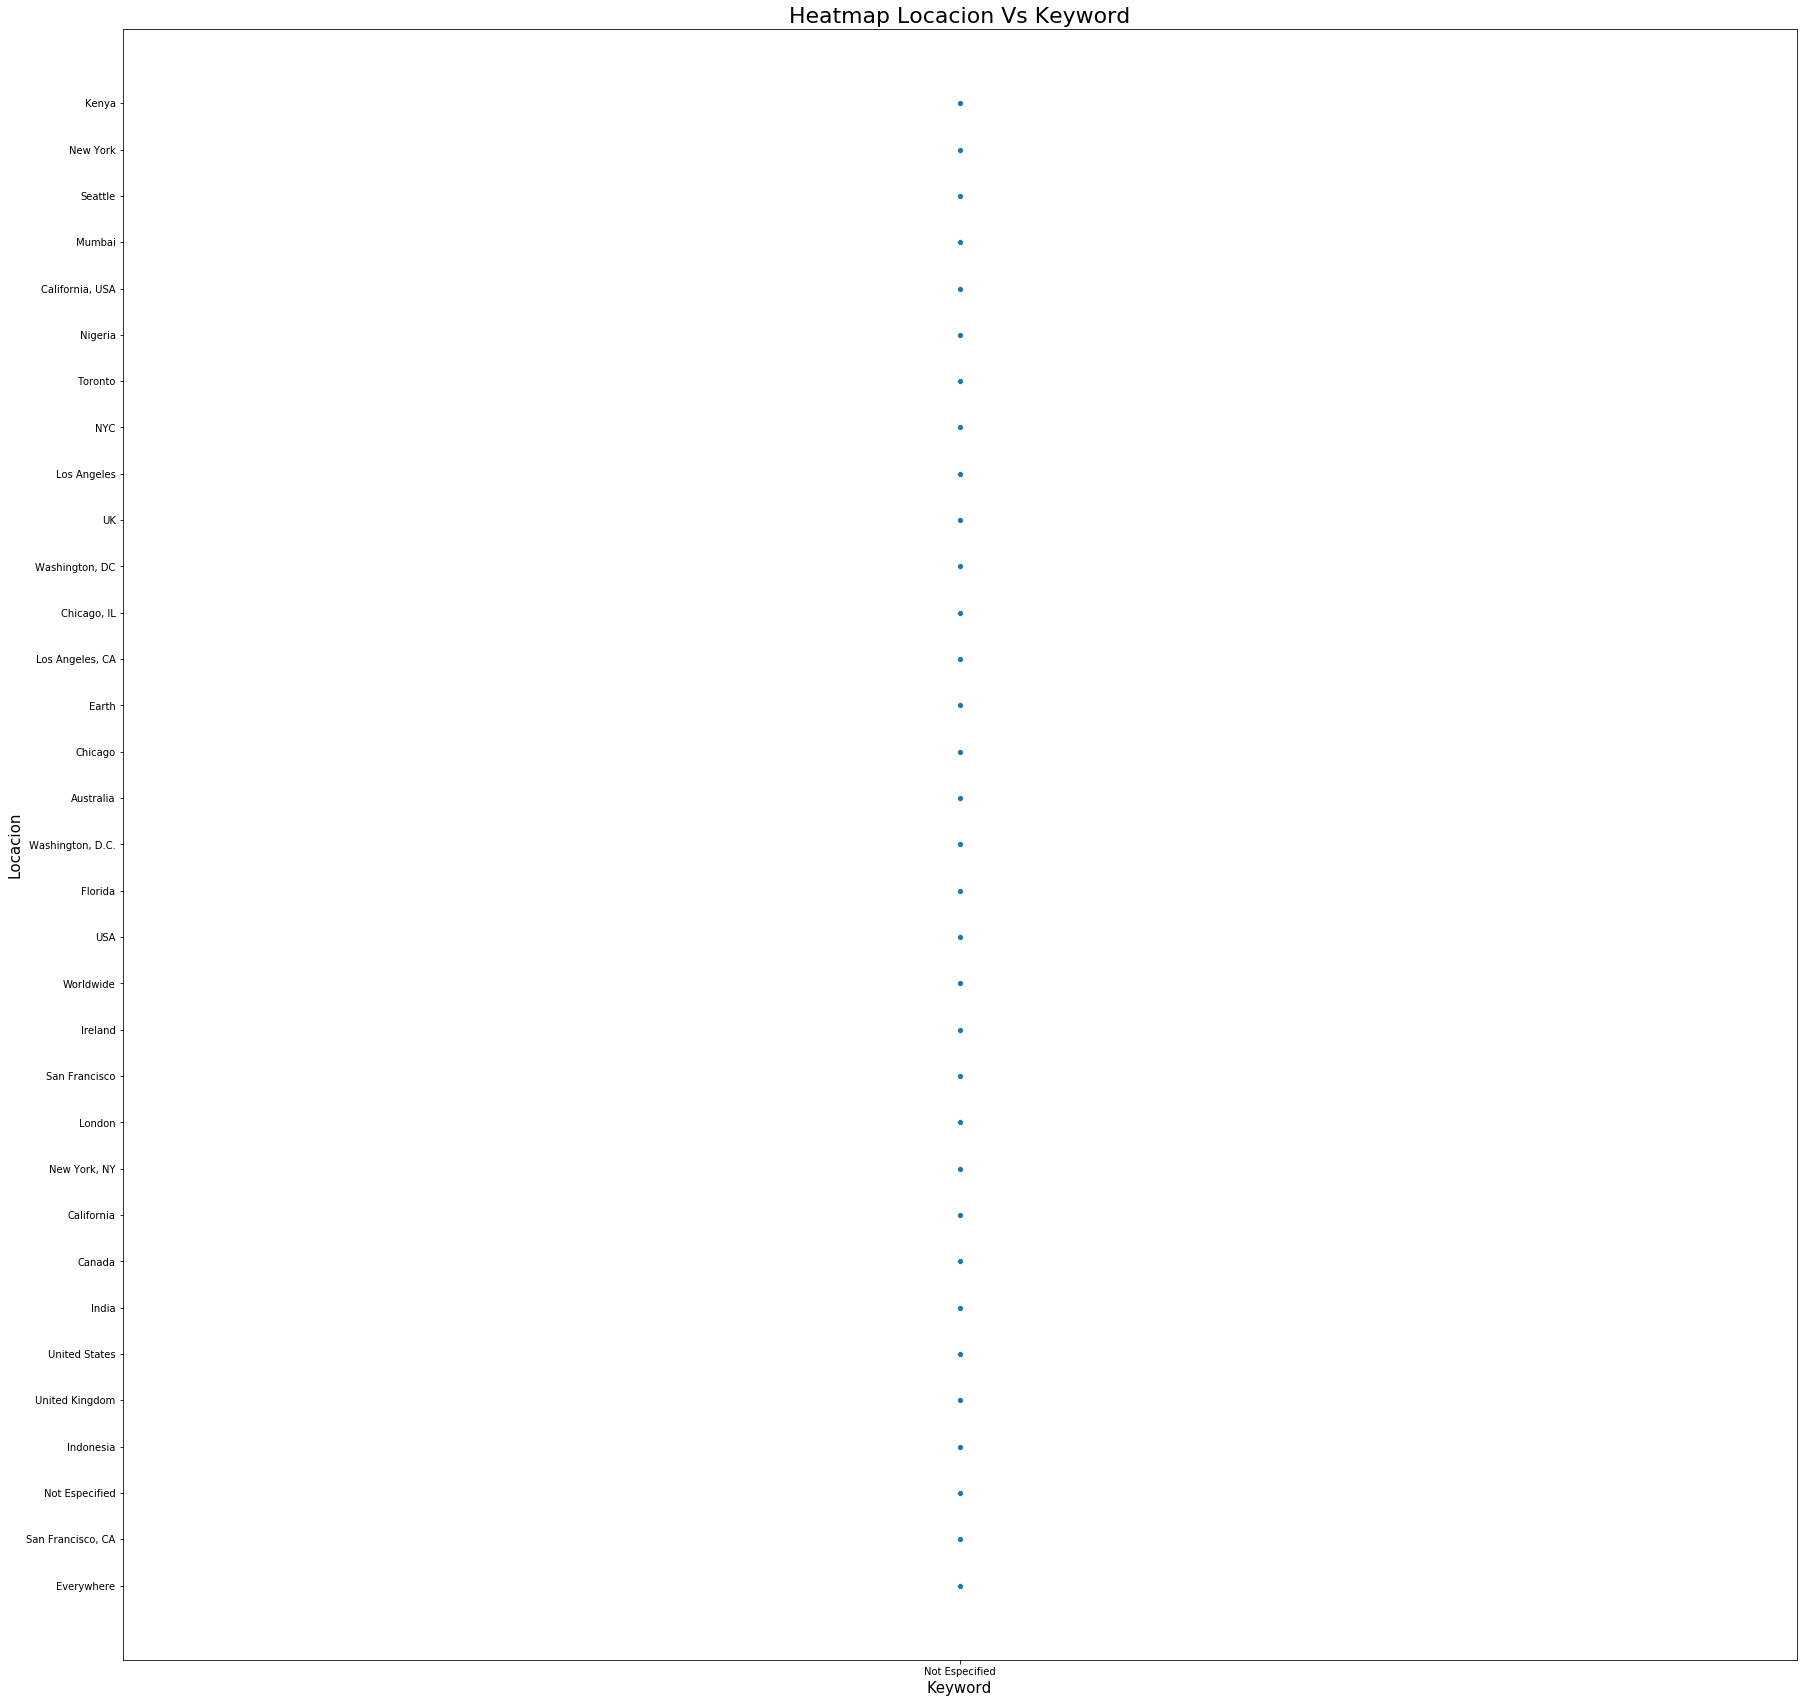

In [35]:
import seaborn as sns

plt.figure(figsize=(30, 30))
g = sns.scatterplot(x = "keyword", y = "location",  data= locations_with_more_than_10_tweets)
g.set_title("Heatmap Locacion Vs Keyword", fontsize=22)
g.set_xlabel("Keyword",fontsize=15)
g.set_ylabel("Locacion", fontsize=15)